In [2]:
#必要ライブラリーのインストール
import pandas as pd
import numpy as np 

In [3]:
#データセットの読み込み
df = pd.read_csv("finance_dataset.csv")
#データフレームの表示
df

,Date,High,Low,Open,Close
0,1965-01-05,1.163391e+05,1.163391e+05,1.163391e+05,1.163391e+05
1,1965-01-06,1.169191e+05,1.169191e+05,1.169191e+05,1.169191e+05
2,1965-01-07,1.178700e+05,1.178700e+05,1.178700e+05,1.178700e+05
3,1965-01-08,1.189948e+05,1.189948e+05,1.189948e+05,1.189948e+05
4,1965-01-12,1.191900e+05,1.191900e+05,1.191900e+05,1.191900e+05
...,...,...,...,...,...
13962,2021-10-15,2.690117e+06,2.657175e+06,2.662822e+06,2.688848e+06
13963,2021-10-18,2.695851e+06,2.675507e+06,2.691178e+06,2.684855e+06
13964,2021-10-19,2.707705e+06,2.689472e+06,2.693348e+06,2.702436e+06
13965,2021-10-20,2.727743e+06,2.703065e+06,2.718200e+06,2.706138e+06


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13967 entries, 0 to 13966
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    13967 non-null  object 
 1   High    13967 non-null  float64
 2   Low     13967 non-null  float64
 3   Open    13967 non-null  float64
 4   Close   13967 non-null  float64
dtypes: float64(4), object(1)
memory usage: 545.7+ KB


In [5]:
#データ型を'datetime'に変換
df['Date']=pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13967 entries, 0 to 13966
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    13967 non-null  datetime64[ns]
 1   High    13967 non-null  float64       
 2   Low     13967 non-null  float64       
 3   Open    13967 non-null  float64       
 4   Close   13967 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 545.7 KB


In [6]:
#曜日情報の追加、月曜0 火曜1 ... 日曜6
df['weekday']=df['Date'].dt.weekday
df

,Date,High,Low,Open,Close,weekday
0,1965-01-05,1.163391e+05,1.163391e+05,1.163391e+05,1.163391e+05,1
1,1965-01-06,1.169191e+05,1.169191e+05,1.169191e+05,1.169191e+05,2
2,1965-01-07,1.178700e+05,1.178700e+05,1.178700e+05,1.178700e+05,3
3,1965-01-08,1.189948e+05,1.189948e+05,1.189948e+05,1.189948e+05,4
4,1965-01-12,1.191900e+05,1.191900e+05,1.191900e+05,1.191900e+05,1
...,...,...,...,...,...,...
13962,2021-10-15,2.690117e+06,2.657175e+06,2.662822e+06,2.688848e+06,4
13963,2021-10-18,2.695851e+06,2.675507e+06,2.691178e+06,2.684855e+06,0
13964,2021-10-19,2.707705e+06,2.689472e+06,2.693348e+06,2.702436e+06,1
13965,2021-10-20,2.727743e+06,2.703065e+06,2.718200e+06,2.706138e+06,2


In [7]:
#1965/1/5を基準にして第何週目なのかを計算する
from datetime import datetime 
from datetime import timedelta 
start = datetime(1965,1,5)
df['weeks']=(df['Date']-start)//timedelta(weeks=1)
df

,Date,High,Low,Open,Close,weekday,weeks
0,1965-01-05,1.163391e+05,1.163391e+05,1.163391e+05,1.163391e+05,1,0
1,1965-01-06,1.169191e+05,1.169191e+05,1.169191e+05,1.169191e+05,2,0
2,1965-01-07,1.178700e+05,1.178700e+05,1.178700e+05,1.178700e+05,3,0
3,1965-01-08,1.189948e+05,1.189948e+05,1.189948e+05,1.189948e+05,4,0
4,1965-01-12,1.191900e+05,1.191900e+05,1.191900e+05,1.191900e+05,1,1
...,...,...,...,...,...,...,...
13962,2021-10-15,2.690117e+06,2.657175e+06,2.662822e+06,2.688848e+06,4,2962
13963,2021-10-18,2.695851e+06,2.675507e+06,2.691178e+06,2.684855e+06,0,2962
13964,2021-10-19,2.707705e+06,2.689472e+06,2.693348e+06,2.702436e+06,1,2963
13965,2021-10-20,2.727743e+06,2.703065e+06,2.718200e+06,2.706138e+06,2,2963


In [8]:
#カラムの並び替え
df = df[['Date','weeks','weekday','High','Low','Open','Close']]
df

,Date,weeks,weekday,High,Low,Open,Close
0,1965-01-05,0,1,1.163391e+05,1.163391e+05,1.163391e+05,1.163391e+05
1,1965-01-06,0,2,1.169191e+05,1.169191e+05,1.169191e+05,1.169191e+05
2,1965-01-07,0,3,1.178700e+05,1.178700e+05,1.178700e+05,1.178700e+05
3,1965-01-08,0,4,1.189948e+05,1.189948e+05,1.189948e+05,1.189948e+05
4,1965-01-12,1,1,1.191900e+05,1.191900e+05,1.191900e+05,1.191900e+05
...,...,...,...,...,...,...,...
13962,2021-10-15,2962,4,2.690117e+06,2.657175e+06,2.662822e+06,2.688848e+06
13963,2021-10-18,2962,0,2.695851e+06,2.675507e+06,2.691178e+06,2.684855e+06
13964,2021-10-19,2963,1,2.707705e+06,2.689472e+06,2.693348e+06,2.702436e+06
13965,2021-10-20,2963,2,2.727743e+06,2.703065e+06,2.718200e+06,2.706138e+06


In [9]:
#日付をデータとして扱うため、日付をindexにセットする
df.set_index(keys='Date',inplace=True)
df

#データの並び替え
df.sort_values(by='Date',ascending=True,inplace=True)

C:\Users\shins\AppData\Local\Temp\ipykernel_10528\1325830967.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by='Date',ascending=True,inplace=True)


In [10]:
df

,weeks,weekday,High,Low,Open,Close
Date,,,,,,
1965-01-05,0,1,1.163391e+05,1.163391e+05,1.163391e+05,1.163391e+05
1965-01-06,0,2,1.169191e+05,1.169191e+05,1.169191e+05,1.169191e+05
1965-01-07,0,3,1.178700e+05,1.178700e+05,1.178700e+05,1.178700e+05
1965-01-08,0,4,1.189948e+05,1.189948e+05,1.189948e+05,1.189948e+05
1965-01-12,1,1,1.191900e+05,1.191900e+05,1.191900e+05,1.191900e+05
...,...,...,...,...,...,...
2021-10-15,2962,4,2.690117e+06,2.657175e+06,2.662822e+06,2.688848e+06
2021-10-18,2962,0,2.695851e+06,2.675507e+06,2.691178e+06,2.684855e+06
2021-10-19,2963,1,2.707705e+06,2.689472e+06,2.693348e+06,2.702436e+06


In [11]:
#カラムの情報を一行上にずらしたデータフレームを作成する
#翌日と本日のデータを比較するため
df_shift = df.shift(-1)
df_shift

,weeks,weekday,High,Low,Open,Close
Date,,,,,,
1965-01-05,0.0,2.0,1.169191e+05,1.169191e+05,1.169191e+05,1.169191e+05
1965-01-06,0.0,3.0,1.178700e+05,1.178700e+05,1.178700e+05,1.178700e+05
1965-01-07,0.0,4.0,1.189948e+05,1.189948e+05,1.189948e+05,1.189948e+05
1965-01-08,1.0,1.0,1.191900e+05,1.191900e+05,1.191900e+05,1.191900e+05
1965-01-12,1.0,2.0,1.185545e+05,1.185545e+05,1.185545e+05,1.185545e+05
...,...,...,...,...,...,...
2021-10-15,2962.0,0.0,2.695851e+06,2.675507e+06,2.691178e+06,2.684855e+06
2021-10-18,2963.0,1.0,2.707705e+06,2.689472e+06,2.693348e+06,2.702436e+06
2021-10-19,2963.0,2.0,2.727743e+06,2.703065e+06,2.718200e+06,2.706138e+06


In [12]:
#翌日の終値と本日の終値の差分を追加する
df['delta_Close']=df_shift['Close'] - df['Close']
df

,weeks,weekday,High,Low,Open,Close,delta_Close
Date,,,,,,,
1965-01-05,0,1,1.163391e+05,1.163391e+05,1.163391e+05,1.163391e+05,579.976807
1965-01-06,0,2,1.169191e+05,1.169191e+05,1.169191e+05,1.169191e+05,950.902710
1965-01-07,0,3,1.178700e+05,1.178700e+05,1.178700e+05,1.178700e+05,1124.803162
1965-01-08,0,4,1.189948e+05,1.189948e+05,1.189948e+05,1.189948e+05,195.173645
1965-01-12,1,1,1.191900e+05,1.191900e+05,1.191900e+05,1.191900e+05,-635.474548
...,...,...,...,...,...,...,...
2021-10-15,2962,4,2.690117e+06,2.657175e+06,2.662822e+06,2.688848e+06,-3993.217773
2021-10-18,2962,0,2.695851e+06,2.675507e+06,2.691178e+06,2.684855e+06,17580.419922
2021-10-19,2963,1,2.707705e+06,2.689472e+06,2.693348e+06,2.702436e+06,3702.890625


In [13]:
#目的変数Upの追加(翌日の終値が上がる場合は1を、下がる場合は0とする)
df['Up']=0
df['Up'][df['delta_Close']>0]=1
df = df.drop('delta_Close',axis=1)
df

C:\Users\shins\AppData\Local\Temp\ipykernel_10528\3565653444.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Up'][df['delta_Close']>0]=1


,weeks,weekday,High,Low,Open,Close,Up
Date,,,,,,,
1965-01-05,0,1,1.163391e+05,1.163391e+05,1.163391e+05,1.163391e+05,1
1965-01-06,0,2,1.169191e+05,1.169191e+05,1.169191e+05,1.169191e+05,1
1965-01-07,0,3,1.178700e+05,1.178700e+05,1.178700e+05,1.178700e+05,1
1965-01-08,0,4,1.189948e+05,1.189948e+05,1.189948e+05,1.189948e+05,1
1965-01-12,1,1,1.191900e+05,1.191900e+05,1.191900e+05,1.191900e+05,0
...,...,...,...,...,...,...,...
2021-10-15,2962,4,2.690117e+06,2.657175e+06,2.662822e+06,2.688848e+06,0
2021-10-18,2962,0,2.695851e+06,2.675507e+06,2.691178e+06,2.684855e+06,1
2021-10-19,2963,1,2.707705e+06,2.689472e+06,2.693348e+06,2.702436e+06,1


<AxesSubplot:xlabel='Date'>

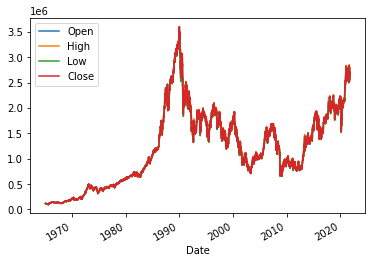

In [14]:
#グラフを用いて全体像の可視化
#始値、最高値、最安値、終値
df_new = df[['Open','High','Low','Close']]

#matplotlibのimport
import matplotlib.pyplot as plt 
%matplotlib inline 

#時系列折れ線グラフ
df_new.plot(kind='line')

In [15]:
#追加するカラム、終値の前日比率、始値・終値の差分

#終値の前日比の追加
df_shift = df.shift(1)

df['Close_ratio']=(df['Close']-df_shift['Close'])/df_shift['Close']
df

,weeks,weekday,High,Low,Open,Close,Up,Close_ratio
Date,,,,,,,,
1965-01-05,0,1,1.163391e+05,1.163391e+05,1.163391e+05,1.163391e+05,1,NaN
1965-01-06,0,2,1.169191e+05,1.169191e+05,1.169191e+05,1.169191e+05,1,0.004985
1965-01-07,0,3,1.178700e+05,1.178700e+05,1.178700e+05,1.178700e+05,1,0.008133
1965-01-08,0,4,1.189948e+05,1.189948e+05,1.189948e+05,1.189948e+05,1,0.009543
1965-01-12,1,1,1.191900e+05,1.191900e+05,1.191900e+05,1.191900e+05,0,0.001640
...,...,...,...,...,...,...,...,...
2021-10-15,2962,4,2.690117e+06,2.657175e+06,2.662822e+06,2.688848e+06,0,0.018133
2021-10-18,2962,0,2.695851e+06,2.675507e+06,2.691178e+06,2.684855e+06,1,-0.001485
2021-10-19,2963,1,2.707705e+06,2.689472e+06,2.693348e+06,2.702436e+06,1,0.006548


In [16]:
#始値と終値の差分を計算
df['Body']=df['Open']-df['Close']
df

,weeks,weekday,High,Low,Open,Close,Up,Close_ratio,Body
Date,,,,,,,,,
1965-01-05,0,1,1.163391e+05,1.163391e+05,1.163391e+05,1.163391e+05,1,NaN,0.000000
1965-01-06,0,2,1.169191e+05,1.169191e+05,1.169191e+05,1.169191e+05,1,0.004985,0.000000
1965-01-07,0,3,1.178700e+05,1.178700e+05,1.178700e+05,1.178700e+05,1,0.008133,0.000000
1965-01-08,0,4,1.189948e+05,1.189948e+05,1.189948e+05,1.189948e+05,1,0.009543,0.000000
1965-01-12,1,1,1.191900e+05,1.191900e+05,1.191900e+05,1.191900e+05,0,0.001640,0.000000
...,...,...,...,...,...,...,...,...,...
2021-10-15,2962,4,2.690117e+06,2.657175e+06,2.662822e+06,2.688848e+06,0,0.018133,-26026.826172
2021-10-18,2962,0,2.695851e+06,2.675507e+06,2.691178e+06,2.684855e+06,1,-0.001485,6323.242188
2021-10-19,2963,1,2.707705e+06,2.689472e+06,2.693348e+06,2.702436e+06,1,0.006548,-9087.221680


やりたいこと\
月曜日から木曜日までの情報を基に金曜日の始まり値が上がるか下がるかの予測を行う
これによって、購入・売却の意思決定に役立てる

月曜から金曜までのデータがそろっている週のデータのみ利用し、祝日など取引がされていない日がある場合はデータとして扱わない

In [17]:
#週番号をリストに収納
list_weeks = []
list_weeks = df['weeks'].unique()
list_weeks

array([   0,    1,    2, ..., 2961, 2962, 2963], dtype=int64)

In [18]:
#週ごとの日数を入力
df['week_days']=0

for i in list_weeks:
    df['week_days'][df['weeks']==i]= len(df[df['weeks']==i])

df

C:\Users\shins\AppData\Local\Temp\ipykernel_10528\954648699.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['week_days'][df['weeks']==i]= len(df[df['weeks']==i])
C:\Users\shins\AppData\Local\Temp\ipykernel_10528\954648699.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['week_days'][df['weeks']==i]= len(df[df['weeks']==i])
C:\Users\shins\AppData\Local\Temp\ipykernel_10528\954648699.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

,weeks,weekday,High,Low,Open,Close,Up,Close_ratio,Body,week_days
Date,,,,,,,,,,
1965-01-05,0,1,1.163391e+05,1.163391e+05,1.163391e+05,1.163391e+05,1,NaN,0.000000,4
1965-01-06,0,2,1.169191e+05,1.169191e+05,1.169191e+05,1.169191e+05,1,0.004985,0.000000,4
1965-01-07,0,3,1.178700e+05,1.178700e+05,1.178700e+05,1.178700e+05,1,0.008133,0.000000,4
1965-01-08,0,4,1.189948e+05,1.189948e+05,1.189948e+05,1.189948e+05,1,0.009543,0.000000,4
1965-01-12,1,1,1.191900e+05,1.191900e+05,1.191900e+05,1.191900e+05,0,0.001640,0.000000,4
...,...,...,...,...,...,...,...,...,...,...
2021-10-15,2962,4,2.690117e+06,2.657175e+06,2.662822e+06,2.688848e+06,0,0.018133,-26026.826172,5
2021-10-18,2962,0,2.695851e+06,2.675507e+06,2.691178e+06,2.684855e+06,1,-0.001485,6323.242188,5
2021-10-19,2963,1,2.707705e+06,2.689472e+06,2.693348e+06,2.702436e+06,1,0.006548,-9087.221680,3


In [19]:
df = df[df['week_days']==5]
df

,weeks,weekday,High,Low,Open,Close,Up,Close_ratio,Body,week_days
Date,,,,,,,,,,
1965-01-19,2,1,1.175064e+05,1.175064e+05,1.175064e+05,1.175064e+05,0,-0.001054,0.000000,5
1965-01-20,2,2,1.173714e+05,1.173714e+05,1.173714e+05,1.173714e+05,1,-0.001149,0.000000,5
1965-01-21,2,3,1.175175e+05,1.175175e+05,1.175175e+05,1.175175e+05,0,0.001245,0.000000,5
1965-01-22,2,4,1.167193e+05,1.167193e+05,1.167193e+05,1.167193e+05,0,-0.006793,0.000000,5
1965-01-25,2,0,1.155991e+05,1.155991e+05,1.155991e+05,1.155991e+05,0,-0.009597,0.000000,5
...,...,...,...,...,...,...,...,...,...,...
2021-10-12,2962,1,2.633371e+06,2.605390e+06,2.632446e+06,2.611331e+06,0,-0.009390,21115.112305,5
2021-10-13,2962,2,2.623762e+06,2.589395e+06,2.597903e+06,2.602976e+06,1,-0.003200,-5072.685547,5
2021-10-14,2962,3,2.643343e+06,2.611646e+06,2.614458e+06,2.640961e+06,1,0.014593,-26503.056641,5


In [20]:
#金曜日は予測したい値なので削除する
#weekday=4となるデータ

df = df[df['weekday']!=4]
df

,weeks,weekday,High,Low,Open,Close,Up,Close_ratio,Body,week_days
Date,,,,,,,,,,
1965-01-19,2,1,1.175064e+05,1.175064e+05,1.175064e+05,1.175064e+05,0,-0.001054,0.000000,5
1965-01-20,2,2,1.173714e+05,1.173714e+05,1.173714e+05,1.173714e+05,1,-0.001149,0.000000,5
1965-01-21,2,3,1.175175e+05,1.175175e+05,1.175175e+05,1.175175e+05,0,0.001245,0.000000,5
1965-01-25,2,0,1.155991e+05,1.155991e+05,1.155991e+05,1.155991e+05,0,-0.009597,0.000000,5
1965-01-26,3,1,1.154446e+05,1.154446e+05,1.154446e+05,1.154446e+05,1,-0.001336,0.000000,5
...,...,...,...,...,...,...,...,...,...,...
2021-10-11,2961,0,2.643776e+06,2.580132e+06,2.587925e+06,2.636083e+06,0,0.016017,-48158.173828,5
2021-10-12,2962,1,2.633371e+06,2.605390e+06,2.632446e+06,2.611331e+06,0,-0.009390,21115.112305,5
2021-10-13,2962,2,2.623762e+06,2.589395e+06,2.597903e+06,2.602976e+06,1,-0.003200,-5072.685547,5


In [21]:
#必要なカラムのみ残す
df = df[['weekday','High','Low','Open','Close','Close_ratio','Body','Up']]
df

,weekday,High,Low,Open,Close,Close_ratio,Body,Up
Date,,,,,,,,
1965-01-19,1,1.175064e+05,1.175064e+05,1.175064e+05,1.175064e+05,-0.001054,0.000000,0
1965-01-20,2,1.173714e+05,1.173714e+05,1.173714e+05,1.173714e+05,-0.001149,0.000000,1
1965-01-21,3,1.175175e+05,1.175175e+05,1.175175e+05,1.175175e+05,0.001245,0.000000,0
1965-01-25,0,1.155991e+05,1.155991e+05,1.155991e+05,1.155991e+05,-0.009597,0.000000,0
1965-01-26,1,1.154446e+05,1.154446e+05,1.154446e+05,1.154446e+05,-0.001336,0.000000,1
...,...,...,...,...,...,...,...,...
2021-10-11,0,2.643776e+06,2.580132e+06,2.587925e+06,2.636083e+06,0.016017,-48158.173828,0
2021-10-12,1,2.633371e+06,2.605390e+06,2.632446e+06,2.611331e+06,-0.009390,21115.112305,0
2021-10-13,2,2.623762e+06,2.589395e+06,2.597903e+06,2.602976e+06,-0.003200,-5072.685547,1


2018~2020を学習データに、2021以降を検証データとする

In [22]:
#訓練データ
df_train = df['2018-01-01':'2020-12-31']
df_train

,weekday,High,Low,Open,Close,Close_ratio,Body,Up
Date,,,,,,,,
2018-01-09,1,2.215616e+06,2.200485e+06,2.215280e+06,2.206124e+06,0.005712,9155.693359,0
2018-01-10,2,2.207490e+06,2.197379e+06,2.204535e+06,2.200408e+06,-0.002591,4126.547852,0
2018-01-11,3,2.195485e+06,2.183170e+06,2.188216e+06,2.193215e+06,-0.003269,-4998.613281,0
2018-01-15,0,2.204577e+06,2.190864e+06,2.204088e+06,2.193626e+06,0.002581,10461.713867,1
2018-01-16,1,2.216492e+06,2.192419e+06,2.194208e+06,2.215542e+06,0.009991,-21334.257812,0
...,...,...,...,...,...,...,...,...
2020-12-21,0,2.488774e+06,2.454361e+06,2.482154e+06,2.471084e+06,-0.001830,11070.371094,0
2020-12-22,1,2.464199e+06,2.438454e+06,2.456738e+06,2.445366e+06,-0.010407,11371.899414,1
2020-12-23,2,2.459132e+06,2.443363e+06,2.458690e+06,2.453543e+06,0.003344,5146.757812,1


In [23]:
#検証用データ
df_val = df['2021-01-01':]
df_val

,weekday,High,Low,Open,Close,Close_ratio,Body,Up
Date,,,,,,,,
2021-01-12,1,2.616582e+06,2.580699e+06,2.590404e+06,2.605201e+06,0.000899,-14797.290039,1
2021-01-13,2,2.636567e+06,2.602357e+06,2.602959e+06,2.632235e+06,0.010377,-29275.346680,1
2021-01-14,3,2.680606e+06,2.628071e+06,2.630953e+06,2.654589e+06,0.008493,-23636.459961,0
2021-01-18,0,2.622372e+06,2.600317e+06,2.612078e+06,2.612405e+06,-0.009712,-326.640625,1
2021-01-19,1,2.656684e+06,2.624534e+06,2.627508e+06,2.648595e+06,0.013853,-21087.290039,0
...,...,...,...,...,...,...,...,...
2021-10-11,0,2.643776e+06,2.580132e+06,2.587925e+06,2.636083e+06,0.016017,-48158.173828,0
2021-10-12,1,2.633371e+06,2.605390e+06,2.632446e+06,2.611331e+06,-0.009390,21115.112305,0
2021-10-13,2,2.623762e+06,2.589395e+06,2.597903e+06,2.602976e+06,-0.003200,-5072.685547,1


In [24]:
#学習データを説明変数(X_train)と目的変数(y_train)に分ける
X_train = df_train[['weekday','High','Low','Open','Close','Close_ratio','Body']]
y_train = df_train['Up']

print(X_train)
print(y_train)

            weekday          High           Low          Open         Close  \
Date                                                                          
2018-01-09        1  2.215616e+06  2.200485e+06  2.215280e+06  2.206124e+06   
2018-01-10        2  2.207490e+06  2.197379e+06  2.204535e+06  2.200408e+06   
2018-01-11        3  2.195485e+06  2.183170e+06  2.188216e+06  2.193215e+06   
2018-01-15        0  2.204577e+06  2.190864e+06  2.204088e+06  2.193626e+06   
2018-01-16        1  2.216492e+06  2.192419e+06  2.194208e+06  2.215542e+06   
...             ...           ...           ...           ...           ...   
2020-12-21        0  2.488774e+06  2.454361e+06  2.482154e+06  2.471084e+06   
2020-12-22        1  2.464199e+06  2.438454e+06  2.456738e+06  2.445366e+06   
2020-12-23        2  2.459132e+06  2.443363e+06  2.458690e+06  2.453543e+06   
2020-12-24        3  2.475719e+06  2.460987e+06  2.463748e+06  2.466822e+06   
2020-12-28        0  2.483998e+06  2.466475e+06  2.4

In [25]:
#検証用データを説明変数(X_val)と目的変数(y_val)に分ける
X_val = df_val[['weekday','High','Low','Open','Close','Close_ratio','Body']]
y_val = df_val['Up']

print(X_val)
print(y_val)

            weekday          High           Low          Open         Close  \
Date                                                                          
2021-01-12        1  2.616582e+06  2.580699e+06  2.590404e+06  2.605201e+06   
2021-01-13        2  2.636567e+06  2.602357e+06  2.602959e+06  2.632235e+06   
2021-01-14        3  2.680606e+06  2.628071e+06  2.630953e+06  2.654589e+06   
2021-01-18        0  2.622372e+06  2.600317e+06  2.612078e+06  2.612405e+06   
2021-01-19        1  2.656684e+06  2.624534e+06  2.627508e+06  2.648595e+06   
...             ...           ...           ...           ...           ...   
2021-10-11        0  2.643776e+06  2.580132e+06  2.587925e+06  2.636083e+06   
2021-10-12        1  2.633371e+06  2.605390e+06  2.632446e+06  2.611331e+06   
2021-10-13        2  2.623762e+06  2.589395e+06  2.597903e+06  2.602976e+06   
2021-10-14        3  2.643343e+06  2.611646e+06  2.614458e+06  2.640961e+06   
2021-10-18        0  2.695851e+06  2.675507e+06  2.6

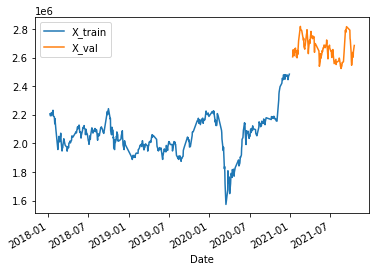

In [26]:
#学習データと検証データの終値(Close)の折れ線グラフ
X_train['Close'].plot(kind='line')
X_val['Close'].plot(kind='line')

plt.legend(['X_train','X_val'])

plt.show()

説明変数: 週ごとに4日分ずつまとめる\
目的変数: 木曜日のみ取り出す\
標準化

In [29]:
#標準化
from sklearn.preprocessing import StandardScaler
import numpy as np 

#4日ごとにデータを抜き出して、標準化とnumpy配列に変換する関数の定義
def std_to_np(df):
    df_list = []
    df = np.array(df)
    for i in range(0,len(df)-3,4):
        df_s = df[i:i+4]
        scl = StandardScaler()
        df_std = scl.fit_transform(df_s)
        df_list.append(df_std)
    return np.array(df_list)

In [30]:
X_train_np_array = std_to_np(X_train)
X_val_np_array = std_to_np(X_val)

#学習データと検証データの形の確認
print(X_train_np_array.shape)
print(X_val_np_array.shape)

(118, 4, 7)
(32, 4, 7)


In [38]:
a = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
a[3::4]

[4, 8, 12]

In [39]:
#週の4日目(木曜日のデータだけ抜き出す)
y_train_new = y_train[3::4]
y_val_new = y_val[3::4]

#学習データと検証データ
print(len(y_train_new))
print(len(y_val_new))

118
32


In [40]:
import tensorflow as tf
from tensorflow.keras import layers,models

print(tf.__version__)

2.8.0


In [44]:
class Model(tf.keras.Model):
    def __init__(self):
        super(Model,self).__init__()
        self.lstm1 = layers.LSTM(256,activation='relu',batch_input_shape=(None,4,7))
        self.dropout = layers.Dropout(0.2)
        self.fc1 = layers.Dense(256,activation='relu')
        self.fc2 = layers.Dense(1,activation='relu')
    
    def call(self,X):
        X = self.lstm1(X)
        X = self.dropout(X)
        X = self.fc1(X)
        X = self.dropout(X)
        X = self.fc2(X)

        return X

In [41]:
#時系列分割のためTimeSeriesSplitのimport
from sklearn.model_selection import TimeSeriesSplit

#accuracy算出のためaccuracy_scoreのimport
from sklearn.metrics import accuracy_score

In [46]:
valid_scores = []
tscv = TimeSeriesSplit(n_splits=4)

for fold, (train_indices,valid_indices) in enumerate(tscv.split(X_train_np_array)):
    X_train, X_valid = X_train_np_array[train_indices],X_train_np_array[valid_indices]
    y_train, y_valid = y_train_new[train_indices],y_train_new[valid_indices]

    model = Model()
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

    #モデルの学習
    model.fit(X_train,y_train,epochs=10,batch_size=64)

    #予測
    y_valid_pred = model.predict(X_valid)
    
    #二値化処理
    y_valid_pred = np.where(y_valid_pred < 0.5, 0, 1)

    #予測精度の算出と表示
    score = accuracy_score(y_valid,y_valid_pred)
    print(f'fold {fold} MAE: {score}')

    #予測精度スコアをリストに格納
    valid_scores.append(score)

print(f'valid_scores: {valid_scores}')
cv_score = np.mean(valid_scores)
print(f'Cv score: {cv_score}')

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 1.7990 - accuracy: 0.3846
Epoch 2/10
1/1 [==============================] - 0s 11ms/step - loss: 1.0979 - accuracy: 0.3846
Epoch 3/10
1/1 [==============================] - 0s 23ms/step - loss: 0.8532 - accuracy: 0.3846
Epoch 4/10
1/1 [==============================] - 0s 22ms/step - loss: 0.7497 - accuracy: 0.3846
Epoch 5/10
1/1 [==============================] - 0s 19ms/step - loss: 0.7002 - accuracy: 0.3846
Epoch 6/10
1/1 [==============================] - 0s 24ms/step - loss: 0.6516 - accuracy: 0.6154
Epoch 7/10
1/1 [==============================] - 0s 19ms/step - loss: 0.6563 - accuracy: 0.6154
Epoch 8/10
1/1 [==============================] - 0s 14ms/step - loss: 0.8584 - accuracy: 0.6154
Epoch 9/10
1/1 [==============================] - 0s 16ms/step - loss: 0.7201 - accuracy: 0.6154
Epoch 10/10
1/1 [==============================] - 0s 13ms/step - loss: 0.7209 - accuracy: 0.6154
fold 0 MAE: 0.4782608695652174


二値予測の場合、目安は50%程度の正答率

In [47]:
#モデルのcompile
model = Model()
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

#モデルの学習を実行
result = model.fit(X_train_np_array,y_train_new,epochs=10)

Epoch 1/10
4/4 [==============================] - 1s 10ms/step - loss: 1.5642 - accuracy: 0.4237
Epoch 2/10
4/4 [==============================] - 0s 12ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 3/10
4/4 [==============================] - 0s 13ms/step - loss: 0.7391 - accuracy: 0.5763
Epoch 4/10
4/4 [==============================] - 0s 13ms/step - loss: 0.7600 - accuracy: 0.5763
Epoch 5/10
4/4 [==============================] - 0s 14ms/step - loss: 0.6939 - accuracy: 0.5763
Epoch 6/10
4/4 [==============================] - 0s 12ms/step - loss: 0.6890 - accuracy: 0.5508
Epoch 7/10
4/4 [==============================] - 0s 12ms/step - loss: 0.6735 - accuracy: 0.5932
Epoch 8/10
4/4 [==============================] - 0s 11ms/step - loss: 0.6842 - accuracy: 0.5085
Epoch 9/10
4/4 [==============================] - 0s 13ms/step - loss: 0.6650 - accuracy: 0.6186
Epoch 10/10
4/4 [==============================] - 0s 13ms/step - loss: 0.6717 - accuracy: 0.6017


In [48]:
#作成したモデルより検証を行う
pred = model.predict(X_val_np_array)
pred = np.where(pred<0.5, 0, 1)

#最初の10行の予測結果を表示
pred[:10]

array([[1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1]])

In [49]:
#実際の結果から予測値の正解率を計算する
print('accuracy = ', accuracy_score(y_true=y_val_new,y_pred=pred))

accuracy =  0.625


株価が上がるか下がるかの予測は直感では50%だが、機械学習を用いることでそれを上回る予測が可能となる. 

In [50]:
#混同行列
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

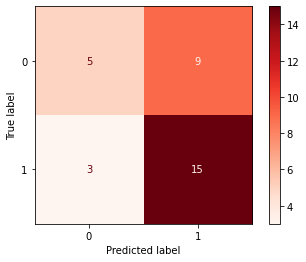

In [51]:
#混同行列を表示
cm = confusion_matrix(y_val_new,pred)
cmp = ConfusionMatrixDisplay(cm)
cmp.plot(cmap=plt.cm.Reds)